# Data Modeling - Classification - Exercise #2

In this exercise you will explore how hard it is to find the best balance between TP and FP.

You will learn about two models that fit multiclass datasets.

We will then turn to applying multi-class classifiers over the well known MNIST digits database, and analyse the results using a confusion matrix.

## Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model) and Multivariate Logistic Regression (a discriminative model).

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathematical analysis clarity, and for matching expected API, each image flattens to create a 1D array with 784 elements.

### Loading the MNIST dataset
#### **Question 1:** Load the MNIST data set. Use
>```mnist = sklearn.datasets.fetch_openml('mnist_784', version=1, return_X_y=True)```

to fetch the original data from the openml.org repository of open datasets for machine learning. Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

Write a function that will plot a single sample of each digit as the original image.
Then, print all digits in one row, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

---
**Note:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions - however, we will use the original data in this exercise. Feel free to test the performance of the algorithms below on the preprocessed data as well.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import bernoulli
from sklearn.linear_model import LogisticRegression

In [2]:
# your code here
mnist = fetch_openml('mnist_784', version=1, return_X_y=True, parser = 'pandas')

In [3]:
def plot_single_samp(data):
  f,axes = plt.subplots(1,10,figsize = (30,7))
  axes = axes.flatten()
  x = data[0]
  y = data[1]
  for i,ax in enumerate(axes):
    index = np.where(y.values == str(i))[0][0]
    ax.imshow(np.reshape(mnist[0].values[index], (28,28)))

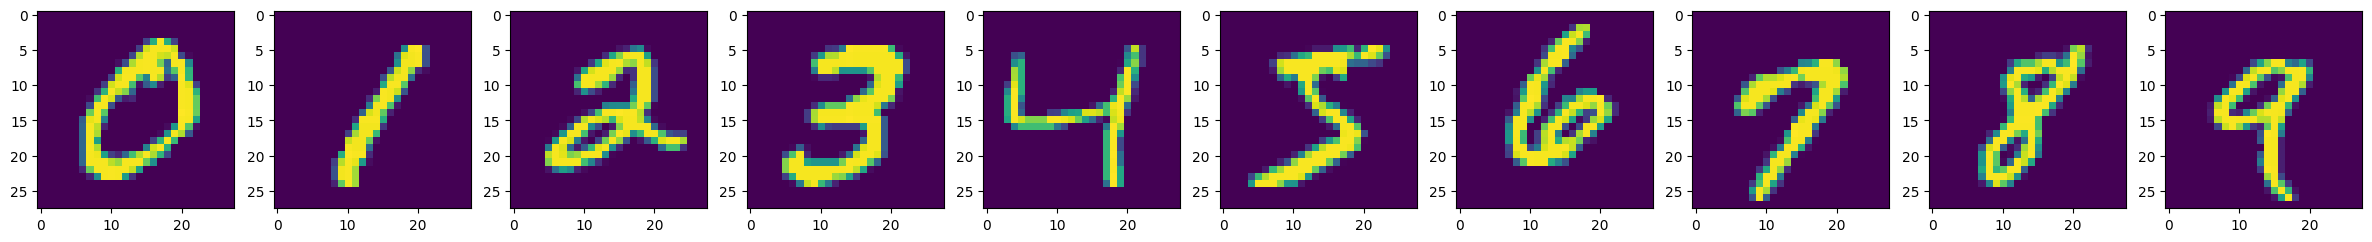

In [4]:
plot_single_samp(mnist)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(mnist[0],mnist[1], test_size = 1/7, random_state = 42)

### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixel is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$

#### **Question 2:** Write the classification rule based on this Naive Bayes model.
How would you estimate each of the parameters of the model based on the training data? **Explain your answer**


**Bonus:** Think of edge cases which may effect your estimator in an undesired way.

We have :

𝜋𝑗 = (number of rows from y_train where y = j) / (number of rows of y_train)

𝑃𝑗𝑖(𝑥𝑖 = 1) = (number of rows from X_train where xi = 1 and y = j)/number of samples with y = j)

𝑃𝑗𝑖(𝑥𝑖 = 0) = (number of rows from X_train where xi = 0 and y = j)/number of samples with y = j)

Edge cases :

- if we do not have samples where y = j for a certain j between 0 and 9
- We assume that features are independant. If features are not independant in a case; it could lead to problem and underperforming for the model.
- if the dataset is imbalanced, it can lead to very different priors which would not be great for our model.


#### **Question 3a**: Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

#### **Question 3b:** Plot the mean image of each class (estimated $\hat{p}_{ji}$) and **generate one sample of each class** (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attibute of the trained model. **The mean should not yield binary output**

#### **Question 3c:** Plot the confusion matrix of your classifier, as calculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.


In [6]:
# 3.a

model = BernoulliNB(binarize = 0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [7]:
#3.b

mean_image = np.exp(model.feature_log_prob_)

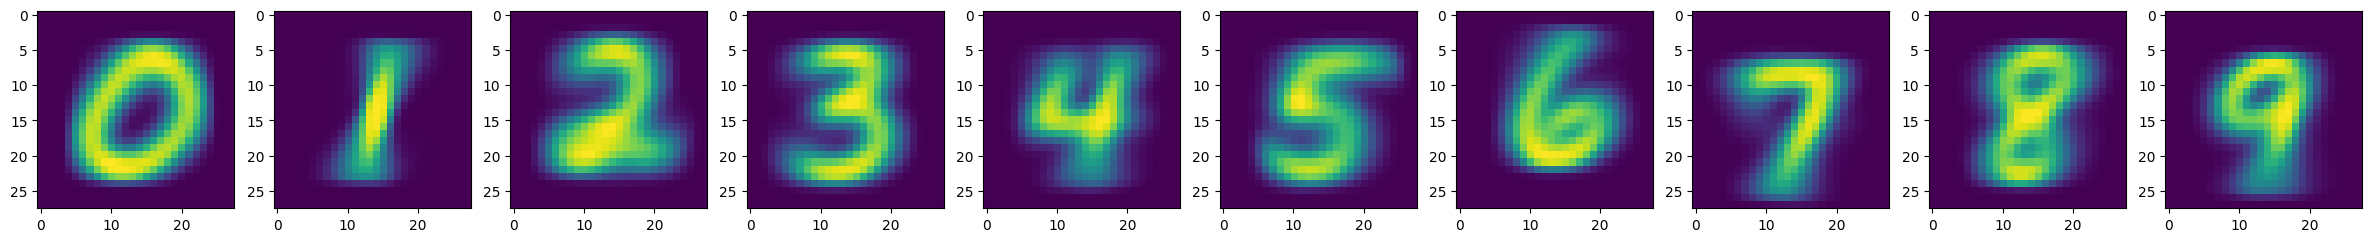

In [8]:
f,axes = plt.subplots(1,10,figsize = (30,7))
for i,ax in enumerate(axes):
  ax.imshow(np.reshape(mean_image[i], (28,28)))

In [9]:
#3.c
accuracy_score(y_test,y_pred),confusion_matrix(y_test,y_pred)

(0.8348,
 array([[ 881,    0,    6,   12,    1,   39,   21,    1,   20,    2],
        [   0, 1110,    6,    6,    0,   12,    3,    0,   12,    3],
        [  13,   16,  805,   26,   17,    6,   41,    5,   36,    2],
        [   5,   30,   49,  830,    2,   23,    8,   14,   45,   28],
        [   2,    7,    6,    0,  724,    6,   16,    5,   18,  122],
        [  20,   17,    7,  139,   24,  680,   20,    3,   13,   14],
        [  12,   33,   21,    1,   13,   25,  855,    0,    1,    0],
        [   5,   22,    8,    2,   27,    3,    0,  890,   19,   79],
        [  16,   39,   19,   80,   10,   33,    5,    5,  720,   42],
        [   6,   21,    4,    9,   77,    4,    0,   33,   29,  853]]))

We get an accuracy of 0.8348 which is quite high. However, we can see on the confusion matrix that we have a lot of FP and FN so our model is not very efficient even if our accuracy is quite high.

### Multivariate Logistic Regression
We will now look at a discriminative model for this problem, specifically, the Multivariate Logistic Regression model. Again, we will use a prepared implementation of the model, so you won't need to implement it.

In this part we will keep the pixel values in grayscale, and assume the probability of each image being classified as one of the 10 digit classes, matches some multivariate logistic function.

#### **Question 4a:** Run a Multivariate Logitic Regression classifier on the training data and apply predictions on the test data. Use the [sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) implementation, and set the `solver` to be `'lbfgs'`.

#### **Question 4b:**  As we did for the Naive Bayes classifier above, plot the confusion matrix of your classifier, as calculated on the test data, and calculate the total accuracy. Summarize the results in your own words.

#### **Question 4c:** Show some test images which were misclassified (classified incorrectly). Choose one such sample, and output the probability estimates for all classes (use the `predict_proba` function). Describe the results.

Note that here we cannot "generate" examples from the model, nor plot the "mean image".

In [10]:
#4.a

model_lr = LogisticRegression(solver = 'lbfgs')
model_lr.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
#4.b
accuracy_score(y_test,y_pred_lr), confusion_matrix(y_test,y_pred_lr)


(0.9189,
 array([[ 941,    0,    5,    1,    3,   10,   11,    4,    7,    1],
        [   0, 1123,    4,    6,    1,    5,    0,    2,    9,    2],
        [   3,   15,  865,   20,   10,    4,   17,    8,   22,    3],
        [   2,    5,   27,  937,    1,   25,    2,   10,   13,   12],
        [   3,    1,    4,    6,  837,    4,   11,    3,    7,   30],
        [   6,    9,    5,   43,    8,  797,   17,    1,   41,   10],
        [   7,    3,   12,    0,   11,   10,  914,    1,    3,    0],
        [   3,    2,   23,    4,    8,    3,    0,  987,    1,   24],
        [   8,   13,   13,   31,    5,   26,    9,    8,  843,   13],
        [   5,    7,    3,   12,   23,    6,    0,   26,    9,  945]]))

We get a very high accuracy (0.9189).
We have a very few FP and FN so our model looks efficient.

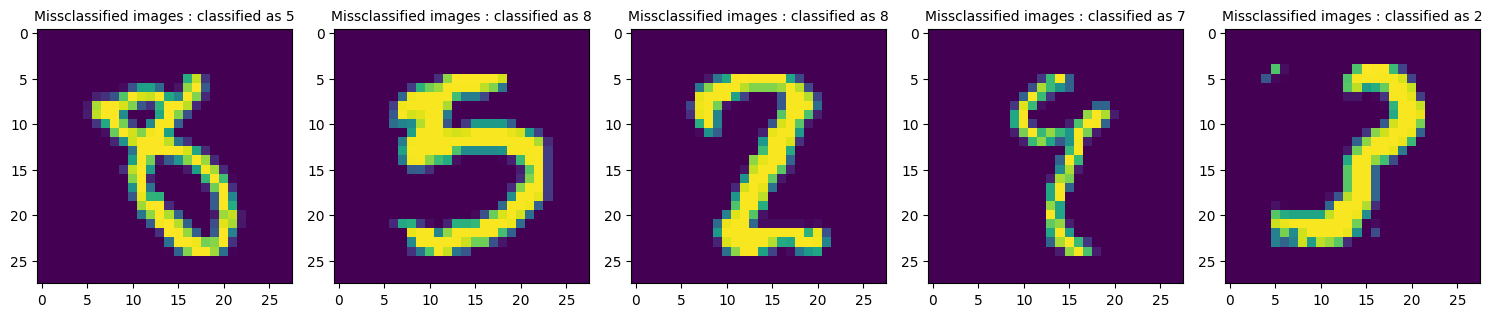

In [12]:
#4.c

indexes = np.where(y_pred_lr !=y_test)[0][:5]
f,axes = plt.subplots(1,5,figsize = (15,7))
axes = axes.flatten()
for index,ax in enumerate(axes):
  ax.imshow(np.reshape(X_test.iloc[indexes[index]].values,(28,28)))
  ax.set_title(f'Missclassified images : classified as {y_pred_lr[indexes[index]]}', fontsize = 10)

plt.tight_layout()
plt.show()



In [13]:
y_pred_proba = model_lr.predict_proba([X_test.iloc[indexes[0]]])
y_pred_proba

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[1.22094914e-06, 2.42611427e-07, 8.51005682e-05, 5.97909223e-04,
        4.16672217e-05, 5.39231626e-01, 5.28410010e-03, 1.62192294e-07,
        4.53747058e-01, 1.01091251e-03]])

For this sample, we should have predicted '8' but we classified it as '5'.

Using predict_proba, we can see that the proba to predict '5' is around 0.5 and the proba to predict '8' is around 0.45 so the proba are very close.
The proba to predict other integers are much more lower.